# Installing and importing necessary Python libraries

In [ ]:
pip install matplotlib

In [ ]:
pip install opencv-python

In [ ]:
pip install SciPy

In [ ]:
pip install pillow 

In [ ]:
pip install keras-lookahead

In [ ]:
pip install typeguard

In [ ]:
pip install keras

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
from tensorflow import keras
from keras.layers import Dense
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

# Loading the Fundus image dataset

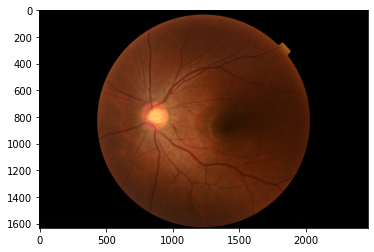

In [4]:
img = image.load_img("/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Artficial_Intelligence/archive/dataset/Train/Normal/NL_001.PNG")
plt.imshow(img)

# Spliting and pre-processing dataset

In [24]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255) 


train_generator = train_datagen.flow_from_directory(
        '/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Artficial_Intelligence/archive/dataset/Train/',  # This is the source directory for training images
        shuffle= True,
        target_size=(200, 200),  
        batch_size=8,
        class_mode='binary', color_mode="grayscale") 



Found 160 images belonging to 2 classes.


In [25]:
validation_generator = train_datagen.flow_from_directory(
        '/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Artficial_Intelligence/archive/dataset/Validation/',  # This is the source directory for training images
        target_size=(200, 200), 
        batch_size=8,
        class_mode='binary', color_mode="grayscale")

Found 40 images belonging to 2 classes.


In [26]:
train_generator.image_shape

(200, 200, 1)

In [28]:
validation_generator.image_shape

(200, 200, 1)

In [29]:
train_generator.class_indices

{'Cataract': 0, 'Normal': 1}

In [30]:
validation_generator.class_indices

{'Cataract': 0, 'Normal': 1}

In [31]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [32]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
DESIRED_ACCURACY = 0.979

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

# Creating the model

In [34]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, ativation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.001),
               metrics=['accuracy']) 

In [36]:
history = model.fit(train_generator, epochs= 50,
                    validation_data = validation_generator,
                    steps_per_epoch=20,
                    callbacks=[callbacks]) 

Epoch 1/50
20/20 [==============================] - 19s 958ms/step - loss: 0.6938 - accuracy: 0.5063 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 18s 919ms/step - loss: 0.6899 - accuracy: 0.4875 - val_loss: 0.6893 - val_accuracy: 0.5250
Epoch 3/50
20/20 [==============================] - 19s 947ms/step - loss: 0.6777 - accuracy: 0.5813 - val_loss: 0.6798 - val_accuracy: 0.6250
Epoch 4/50
20/20 [==============================] - 19s 932ms/step - loss: 0.6583 - accuracy: 0.6188 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 18s 928ms/step - loss: 0.6596 - accuracy: 0.6188 - val_loss: 0.6814 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 19s 950ms/step - loss: 0.6271 - accuracy: 0.6062 - val_loss: 0.6310 - val_accuracy: 0.7500
Epoch 7/50
20/20 [==============================] - 18s 923ms/step - loss: 0.5656 - accuracy: 0.6875 - val_loss: 0.7112 - val_accuracy: 0.5750

# Model evaluation

In [37]:
model.evaluate(validation_generator)

5/5 [==============================] - 4s 604ms/step - loss: 0.7815 - accuracy: 0.8500


[0.781490683555603, 0.8500000238418579]

### Accuracy and Loss plots 

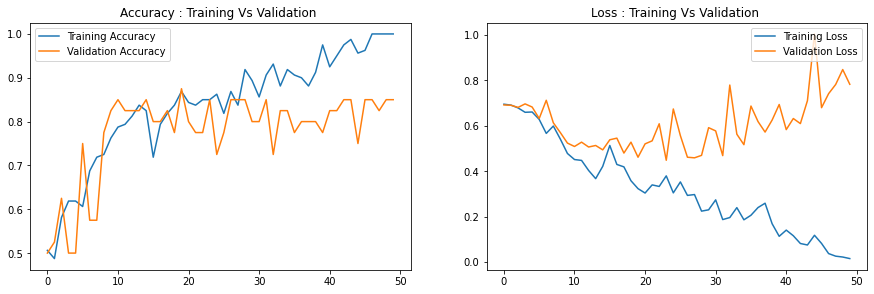

In [38]:
accuracy = history.history['accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(range(50), accuracy, label='Training Accuracy')
plt.plot(range(50), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

In [94]:
STEP_SIZE_TEST= np.math.ceil(validation_generator.n//validation_generator.batch_size)
preds = model.predict_generator(validation_generator, STEP_SIZE_TEST, verbose =1)

5/5 [==============================] - 4s 748ms/step


### Classification report

In [89]:
from sklearn.metrics import classification_report

In [95]:
y_pred = np.around(preds)
target_names = list(validation_generator.class_indices.keys())

ground_truth= validation_generator.classes

print (target_names)
print (ground_truth)

['Cataract', 'Normal']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [96]:
report = classification_report (ground_truth, y_pred, target_names=target_names)
print (report)

              precision    recall  f1-score   support

    Cataract       0.59      0.65      0.62        20
      Normal       0.61      0.55      0.58        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



### Confusion matrix

In [97]:
import itertools
from sklearn.metrics import confusion_matrix

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

13
9
11
7


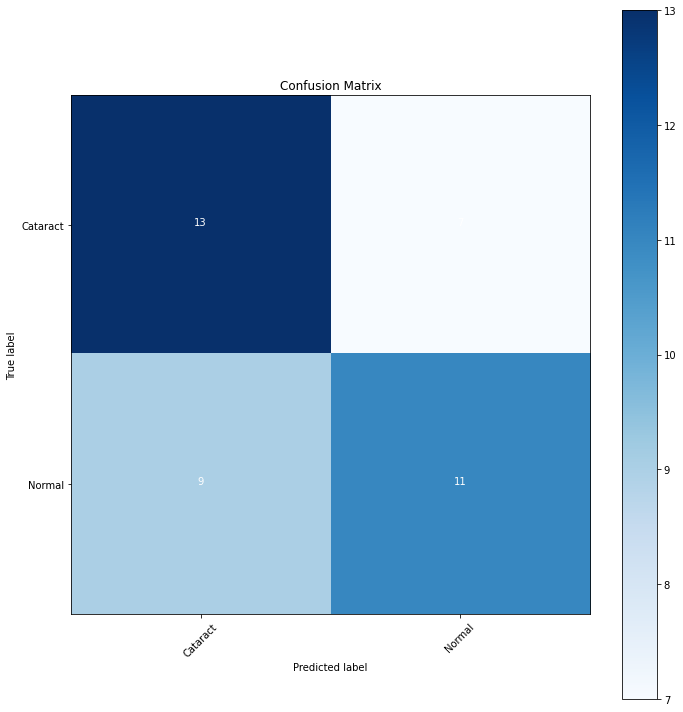

In [104]:
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print(TN)
print(FN)
print(TP)
print(FP)